In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.datasets import imdb
from matplotlib import pyplot as plt
from IPython import display
keras = tf.keras
np.random.seed(10)
maxlen = 200

#Load Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=42,num_words=15000) #we won't use maxlen as it removes test data
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [69]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X[0]))


<START> this highest this of reviewers animation neck effects f happen albeit following like there be army permeate inadvertently film is bullets for places kurt movie outside whether skip christ mention some of feel effective or seen string this of tiresome series his of dick scene of seen br any lost marcus phillips this so hate in same of simon to especially fan kenneth in of investigation i i movie with tea some who think seriously br great but good everything going leaden sentences off his feelings in down of playing hour film especially for whom just enjoyed or hairstyles our will in actually pressure know of their beautiful put was well sexy sidelines in for animation neck to be war rise graffiti insufficient well at recognizing most movie is albeit following all after at wacky more not but though for he reeves that thing another i i not film kurt some more to of wooden never general is nudity of actually pressure altruistic gave is concierge br of empathize previews of performa

In [0]:
X_train,X_test = keras.preprocessing.sequence.pad_sequences(X_train,maxlen=maxlen),keras.preprocessing.sequence.pad_sequences(X_test,maxlen=maxlen)

#Visualization of data


Dataset Size: 50000
Training Size: 25000
Test Size: 25000
Total Unique words:  14998
{0: 25000, 1: 25000}
Mean: 234.75892
Standard Deviation: 172.91149458735703


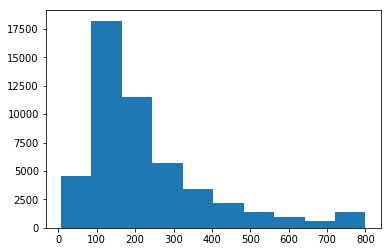

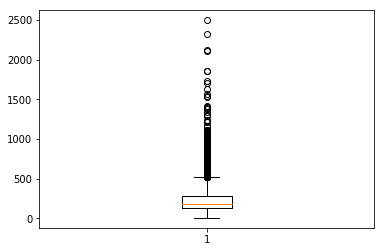

In [104]:
print("Dataset Size: {}\nTraining Size: {}\nTest Size: {}".format(len(X),len(X_train),len(X_test)))
print("Total Unique words: ",len(np.unique(np.hstack(X))))
a,b = np.unique(y,return_counts=True)
print(dict(zip(a,b)))
lengths = [len(x) for x in X]
print("Mean: {}\nStandard Deviation: {}".format(np.mean(lengths),np.std(lengths)))
_ = plt.hist(np.clip(lengths,0,800),bins=10)
plt.show()
_ = plt.boxplot(lengths)

#Model

In [0]:
modellogger = []
logger =[]

In [132]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(15000,32,input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(250,activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 32)           480000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               1600250   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 251       
Total params: 2,080,501
Trainable params: 2,080,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
def evaluate_model(model,model_id,epochs=5,batch_size=128):
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: {:.2f}".format(scores[1]*100))
  print(scores)

In [134]:
evaluate_model(model,len(modellogger)-1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
 - 2s - loss: 8.0212 - acc: 0.5001 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


KeyboardInterrupt: ignored